# POLI– Metodos numericos – Trabajo colaborativo


Por.

CARLOS FELIPE CORTÉS CATAÑO.

ERVIN ARLEY GARCIA HERNANDEZ.

ERIC ARTURO MARTÍNEZ ACELAS.

YEINER ENRIQUE FERNANDEZ BUSTOS.

In [1]:
"""Bloque de codigo definiendo la función:
algoritmo de trazadores cubicos 
e importando librerías a utilizar"""
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
def traza3natural(xi,yi):
    n = len(xi)
    # Valores h
    h = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        h[j] = xi[j+1] - xi[j]
    
    # Sistema de ecuaciones
    A = np.zeros(shape=(n-2,n-2), dtype = float)
    B = np.zeros(n-2, dtype = float)
    S = np.zeros(n, dtype = float)

    A[0,0] = 2*(h[0]+h[1])
    A[0,1] = h[1]
    B[0] = 6*((yi[2]-yi[1])/h[1] - (yi[1]-yi[0])/h[0])

    for i in range(1,n-3,1):
        A[i,i-1] = h[i]
        A[i,i] = 2*(h[i]+h[i+1])
        A[i,i+1] = h[i+1]
        factor21 = (yi[i+2]-yi[i+1])/h[i+1]
        factor10 = (yi[i+1]-yi[i])/h[i]
        B[i] = 6*(factor21 - factor10)
        
    A[n-3,n-4] = h[n-3]
    A[n-3,n-3] = 2*(h[n-3]+h[n-2])
    factor12 = (yi[n-1]-yi[n-2])/h[n-2]
    factor23 = (yi[n-2]-yi[n-3])/h[n-3]
    B[n-3] = 6*(factor12 - factor23)
    
    # Resolver sistema de ecuaciones S
    r = np.linalg.solve(A,B)
    for j in range(1,n-1,1):
        S[j] = r[j-1]
    S[0] = 0
    S[n-1] = 0
    
    # Coeficientes
    a = np.zeros(n-1, dtype = float)
    b = np.zeros(n-1, dtype = float)
    c = np.zeros(n-1, dtype = float)
    d = np.zeros(n-1, dtype = float)
    for j in range(0,n-1,1):
        a[j] = (S[j+1]-S[j])/(6*h[j])
        b[j] = S[j]/2
        factor10 = (yi[j+1]-yi[j])/h[j]
        c[j] = factor10 - (2*h[j]*S[j]+h[j]*S[j+1])/6
        d[j] = yi[j]
    
    # Polinomio trazador
    x = sym.Symbol('x')
    px_tabla = []
    for j in range(0,n-1,1):

        pxtramo = a[j]*(x-xi[j])**3 + b[j]*(x-xi[j])**2
        pxtramo = pxtramo + c[j]*(x-xi[j])+ d[j]
        
        pxtramo = pxtramo.expand()
        px_tabla.append(pxtramo)
    
    return(px_tabla)

In [2]:
# Ingresando datos de prueba reportados en el instrucctivo "Enunciado_TC"
xi = np.array([60 , 120, 180, 240])
fi = np.array([5.5, 7.4, 15.4, 20.1])
import sympy as sp 
x = sp.Symbol('x') 
# Aplicando función trazadores cubicos para crear la tabla de polinomios de acuerdo a los 4 puntos generados
n = len(xi)
px_tabla = traza3natural(xi,fi)
print('Polinomios por trozos: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))
# Una vez creada la tabla se integra los polinomios por medio del siguiente algoritmo
h = 0
for tramo in range(1,n,1):
    t = sp.integrate((px_tabla[tramo-1]), (x,(xi[tramo-1]), (xi[tramo])))
    #Sumamos los valores integrados para hallar el valor de h total o exposición radiante total
    h = h + t
    print(h)
print("El valor de H es igual a: " + str(round(h, 1)))

Polinomios por trozos: 
 x = [60,120]
8.54938271604938e-6*x**3 - 0.00153888888888889*x**2 + 0.0932222222222222*x + 3.6
 x = [120,180]
-1.45061728395062e-5*x**3 + 0.00676111111111111*x**2 - 0.902777777777777*x + 43.44
 x = [180,240]
5.95679012345679e-6*x**3 - 0.00428888888888889*x**2 + 1.08622222222222*x - 75.9
359.300000000000
1034.90000000000
2119.20000000001
El valor de H es igual a: 2119.2


# Comprobado los datos de prueba iniciamos con el ejercicio


In [3]:
#Importamos la tabla csv
import csv
from datetime import datetime
rad_arr = []
with open('DatosEMA-2020-03-23.csv') as File:
    reader = csv.reader(File)
    for row in reader:
        if row[0] == 'time':
            continue
        #Usamos solo los datos de 6 a.m a 6 p.m
        fecha_string = row[0].replace('2020-03-23T', '')
        fecha_string = fecha_string.replace('-05:00', '')
        hora_minutos = datetime.strptime(fecha_string, '%H:%M:%S')
        #Usamos solo datos de la columna 4 que es radiación
        if 6 <= hora_minutos.hour <= 17:
            rad_arr.append(
                float(row[4])
            )

In [4]:
# De acuerdo a la lista creada con la radiación encontramos su longitud
#Para saber el número de iteraciones
s = len(rad_arr)
cantidad = list(range(s))
import sympy as sp 
# Con estos datos podemos definir fi cómo la radiación y xi como la diferencia en el tiempo
#n como la longitu de la tabla para hallar finalmente la tabla de polinomios
fi = np.array(rad_arr)
xi = np.array((cantidad))
x = sp.Symbol('x')
n = len(xi)
px_tabla = traza3natural(xi,fi)

In [5]:
# Creando la tabla de polinomios
print('Tabla de polinomios: ')
for tramo in range(1,n,1):
    print(' x = ['+str(xi[tramo-1])
          +','+str(xi[tramo])+']')
    print(str(px_tabla[tramo-1]))

Tabla de polinomios: 
 x = [0,1]
0.13689181681253*x**3 + 0.45310818318747*x + 1.86
 x = [1,2]
-0.984459084062649*x**3 + 3.36405270262554*x**2 - 2.91094451943807*x + 2.98135090087518
 x = [2,3]
2.63094451943807*x**3 - 18.3283689183788*x**2 + 40.4738987225705*x - 25.9418779271306
 x = [3,4]
-2.91931899368962*x**3 + 31.6240026997704*x**2 - 109.383216131877*x + 123.915236927317
 x = [4,5]
0.956331455320406*x**3 - 14.8838026883499*x**2 + 76.6480054206042*x - 124.126391809325
 x = [5,6]
0.713993172407995*x**3 - 11.2487284446637*x**2 + 58.4726342021734*x - 93.8341064452732
 x = [6,7]
-0.732304144952387*x**3 + 14.7846232678232*x**2 - 97.7274760727479*x + 218.566114104569
 x = [7,8]
0.455223407401551*x**3 - 10.1534553316095*x**2 + 76.8390741232811*x - 188.755836352832
 x = [8,9]
-1.23858948465382*x**3 + 30.4980540777194*x**2 - 248.373001151351*x + 678.476364379519
 x = [9,10]
2.29913453121374*x**3 - 65.0204943507047*x**2 + 611.293934704467*x - 1900.52444318793
 x = [10,11]
-1.77794864020114*x**

43.5118680804254*x**3 - 17081.9965701222*x**2 + 2235013.09115447*x - 97460592.6597797
 x = [133,134]
-230.175719854569*x**3 + 92119.3510159404*x**2 - 12288766.1377919*x + 546426953.156841
 x = [134,135]
145.45101133785*x**3 - 58882.5949234119*x**2 + 7945494.61808134*x - 357370027.272162
 x = [135,136]
141.041674503169*x**3 - 57096.8135053662*x**2 + 7704414.12664517*x - 346521405.157535
 x = [136,137]
-324.547709350527*x**3 + 132863.655106942*x**2 - 18130209.6046287*x + 824648203.993548
 x = [137,138]
219.999162898938*x**3 - 90945.1093875884*x**2 + 12531591.1311219*x - 575574029.605731
 x = [138,139]
-27.4689422452265*x**3 + 11506.6861420959*x**2 - 1606756.6519745*x + 74789968.4167048
 x = [139,140]
-12.6633939180322*x**3 + 5332.77248965582*x**2 - 748582.654285337*x + 35027906.5237734
 x = [140,141]
-2.72748208264475*x**3 + 1159.6895187931*x**2 - 164351.038364557*x + 7763764.44747035
 x = [141,142]
-7.30667775138882*x**3 + 3096.68928667184*x**2 - 437468.005635459*x + 20600261.9092028
 x

-1.70441486515583*x**3 + 1237.29426066507*x**2 - 299383.537563194*x + 24146023.5167727
 x = [241,242]
0.940958820035988*x**3 - 675.310913728615*x**2 + 161554.309465684*x - 12882650.1945472
 x = [242,243]
-3.09942041498808*x**3 + 2258.00441089886*x**2 - 548307.999094164*x + 44379576.0292806
 x = [243,244]
-3.38327716008369*x**3 + 2464.93597807356*x**2 - 598592.369917616*x + 48452610.0659802
 x = [244,245]
7.07252905532285*x**3 - 5188.71417160403*x**2 + 1268898.26660371*x - 103436628.371088
 x = [245,246]
-2.26683906120759*x**3 + 1675.72139404585*x**2 - 412888.446980504*x + 33909286.5716232
 x = [246,247]
-6.53517281049262*x**3 + 4825.75170101819*x**2 - 1187795.9024957*x + 97451697.9238694
 x = [247,248]
5.03753030317811*x**3 - 3749.62130621182*x**2 + 930321.230290111*x - 76939946.0088292
 x = [248,249]
2.4050515977802*x**3 - 1791.05714939577*x**2 + 444597.319399731*x - 36786769.3752245
 x = [249,250]
-3.03773669429892*x**3 + 2274.70570478733*x**2 - 567777.631291861*x + 47240351.5321776


-2.20733752278715*x**3 + 3203.34952824035*x**2 - 1549589.6343399*x + 249865474.612245
 x = [484,485]
-2.18822782958934*x**3 + 3175.60225371712*x**2 - 1536159.95347066*x + 247698819.432007
 x = [485,486]
4.07024884114454*x**3 - 5930.48130220068*x**2 + 2880290.57114948*x - 466294015.381581
 x = [486,487]
-3.52276753498887*x**3 + 5140.13657420184*x**2 - 2500029.71678215*x + 405317871.263342
 x = [487,488]
3.84082129881093*x**3 - 5618.06671197967*x**2 + 2739215.28358825*x - 445186233.796785
 x = [488,489]
-3.15051766025483*x**3 + 4617.2535240926*x**2 - 2255620.99161502*x + 367307133.63628
 x = [489,490]
3.03124934220836*x**3 - 4451.3986685209*x**2 + 2178949.93057298*x - 355527926.680365
 x = [490,491]
-1.35447970857863*x**3 + 1995.62303613597*x**2 - 980090.704708886*x + 160448710.415674
 x = [491,492]
3.28666949210617*x**3 - 4840.78973647273*x**2 + 2376587.96664199*x - 388927698.795419
 x = [492,493]
-3.55219825984614*x**3 + 5253.37906540888*x**2 - 2589743.08388376*x + 425550593.490804
 x 

0.84054292031002*x**3 - 1729.6753160538*x**2 + 1186443.3526903*x - 271273324.354478
 x = [687,688]
-1.72674248999538*x**3 + 3561.49991458562*x**2 - 2448594.03075898*x + 561150236.455408
 x = [688,689]
1.64642703967148*x**3 - 3400.72199464678*x**2 + 2341414.64279291*x - 537358419.345827
 x = [689,690]
-1.31896566869056*x**3 + 2728.74473353756*x**2 - 1881787.9329261*x + 432570438.877639
 x = [690,691]
0.0794356350907438*x**3 - 165.94596528973*x**2 + 115548.649264735*x - 26816975.0262519
 x = [691,692]
1.02122312832757*x**3 - 2118.27143876967*x**2 + 1464605.55143937*x - 337549748.160477
 x = [692,693]
-1.82432814840101*x**3 + 3789.09301171887*x**2 - 2623290.6482987*x + 605391641.912438
 x = [693,694]
2.61608946527648*x**3 - 5442.53520711664*x**2 + 3774227.70735431*x - 872435098.243407
 x = [694,695]
-2.34002971270491*x**3 + 4876.10492144061*x**2 - 3386908.54186442*x + 784174420.742526
 x = [695,696]
1.61402938554315*x**3 - 3368.10829840659*x**2 + 2342819.64592938*x - 543212609.429705
 x =

In [6]:
#Integramos los polinomios
h = 0
for tramo in range(1,n,1):
    t = sp.integrate((px_tabla[tramo-1]), (x,(xi[tramo-1]), (xi[tramo])))
    h = h + t
print("El valor de H es igual a: " + str(round(h, 1)))

El valor de H es igual a: 168877.6


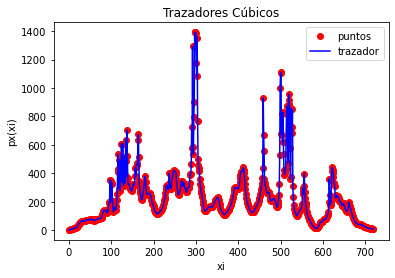

In [7]:
# Creamos la grafica para verificar que si cohincida con la reportada por EMA
import numpy as np
xtraza = np.array([])
ytraza = np.array([])
tramo = 1
muestras = 1 # entre cada par de puntos
while not(tramo>=n):
    a = xi[tramo-1]
    b = xi[tramo]
    xtramo = np.linspace(a,b,muestras)
    # evalua polinomio del tramo
    pxtramo = px_tabla[tramo-1]
    pxt = sym.lambdify('x',pxtramo)
    ytramo = pxt(xtramo)
    # vectores de trazador en x,y
    xtraza = np.concatenate((xtraza,xtramo))
    ytraza = np.concatenate((ytraza,ytramo))
    tramo = tramo + 1
    
# Gráfica
plt.plot(xi,fi,'ro', label='puntos')
plt.plot(xtraza,ytraza, label='trazador'
         , color='blue')
plt.title('Trazadores Cúbicos')
plt.xlabel('xi')
plt.ylabel('px(xi)')
plt.legend()
plt.show()

In [10]:
#Comparamos la tabla
 ![Imagen] (Captura.png)

IndentationError: unexpected indent (<ipython-input-10-7bd899d3d161>, line 2)